In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [2]:
import numpy as np
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Dataset

In [3]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Mestrado/Datasets/oportunidades_classificacao_4.xlsx", sheet_name='Oportunidades')

In [ ]:
import requests
import pandas as pd
url = 'https://github.com/chap0lin/nlp_datasets/blob/master/oportunidades_classificacao_4.xlsx?raw=true'
r = requests.get(url)
open('temp.xlsx', 'wb').write(r.content)
data = pd.read_excel('temp.xlsx', sheet_name='Oportunidades')

In [4]:
print(data.shape)
data.sample(5)

(357, 11)


,opo_titulo,link,opo_texto,opo_texto_ele,opo_brazil,opo_tipo,opo_deadline,codigo,atualizacao,clas,comentario
156,Institutional Grants,https://tinker.org/institutional-grants-apply-...,The Tinker Foundation’s Institutional Grants p...,Organization Status The Tinker Foundation prov...,Y,grant,"September 22, 2021",tinker_210429_1_001,210429,Y,"MAS O PRAZO VEIO ERRADO, NÃO PODE SER O PR..."
175,TWAS-CSIR Postdoctoral Fellowship Programme,https://twas.org//opportunity/twas-csir-postdo...,For young scientists from developing countries...,Applicants for these fellowships must meet the...,Y,fellowship,31 July 2021,twas_210429_1_026,210429,Y,0
169,TWAS-NRF Doctoral Programme,https://twas.org//opportunity/twas-nrf-doctora...,South Africa's National Research Foundation (N...,Applicants for these fellowships must meet the...,Y,grant,20 August 2021,twas_210429_1_019,210429,Y,0
136,David Hopper Prizes for Leadership in Research...,https://www.idrc.ca/en/funding/david-hopper-pr...,David Hopper Prizes for Leadership in Researc...,Eligibility These prizes are available to out...,N,Grant,"Wednesday, April 29, 2020 - 22:00\n",irdc_210429_01_020,210429,Y,0
346,\n \t\t\t\t\t\t\t\n \t\t\t\t\t\t\tPOGO-SCOR Fe...,https://pogo-ocean.org/capacity-development/po...,This programme is jointly funded by POGO and t...,"The fellowship program is open to scientists, ...",Y,fellowship,Applications for 2021 are open from 12 March t...,pogoocean_210601_1_000,210601,Y,NaN


In [5]:
data['clas'].value_counts()

Y    152
N    108
Name: clas, dtype: int64

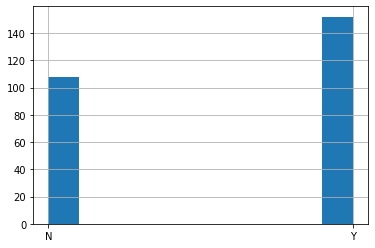

In [6]:
data['clas'].hist()

In [7]:
sentences = data['opo_texto']
labels = data['clas']

In [10]:
print(len(sentences), " - ", len(labels))

357  -  357


In [30]:
newdata = data.copy()
# subSampleBalanced.drop(subSampleBalanced[subSampleBalanced['category'] == 'business'].sample(frac=0.9).index)
# newdata = newdata.drop(newdata[newdata['clas'] != 'Y' or newdata['clas'] != 'N'].index)
# df[(df.line_race != 0) & (df.line_race != 10)]
newdata = newdata[(newdata['clas'] == 'Y') | (newdata['clas'] == 'N')]
sentences = newdata['opo_texto']
labels = newdata['clas']
print(len(sentences), " - ", len(labels))

260  -  260


In [31]:
labels = np.where(labels == "Y", 1, 0)

## Pré-processamento / Text Normalization

## Feature Engineering

### Train Test Split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.20, random_state=32)

Calculando vocab size

In [33]:
alltext = ""
for s in x_train:
  alltext+= s
for s in x_test:
  alltext+= s

vocab = nltk.word_tokenize(alltext)
vocab1 = set(vocab)
print(len(vocab1))

12881


One hot encoding

In [35]:
my_vocab_size = len(vocab1)
encoded_sent_train = [one_hot(i, my_vocab_size) for i in x_train]
encoded_sent_test = [one_hot(i, my_vocab_size) for i in x_test]
print(encoded_sent_train[0])

[7621, 11154, 3390, 10014, 9071, 7621, 3390, 4934, 4457, 12689, 11248, 2735, 4784, 2769, 10002, 11189, 3667, 7707, 5440, 11233, 10663, 7222, 4986, 6522, 3687, 7351, 3831, 12465, 1569, 10551, 5604, 7257, 11995, 1702, 3384, 6522, 4934, 3390, 11925, 3831, 8478, 10783, 1373, 4457, 2163, 10551, 10293, 11995, 10002, 5254, 2427, 5121, 1373, 11154, 3390, 4934, 12689, 4988, 11829, 3727, 4934, 709, 7483, 3687, 10551, 2280, 11496, 7491, 7257, 8017, 10551, 10390, 10014, 1066, 10002, 5254, 2427, 8822, 10014, 4725, 11496, 3831, 3578, 10014, 813, 6770, 4519, 9752, 11780, 4934, 11817, 5464, 7756, 3335, 1410, 4934, 3831, 7878, 3990, 223, 2769, 10014, 543, 10014, 7257, 11200, 5254, 12689, 12113, 10002, 10390, 7621, 2280, 5588, 11885, 11496, 4028, 7257, 8017, 8104, 4938, 4695, 772, 6408, 11914, 2113, 11885, 8871, 2457, 10995, 4934, 8534, 10002, 10014, 9071, 10551, 5447, 9184, 2726, 980, 3687, 4246, 1373, 5254, 10014, 9546, 3708, 2088, 12179, 8822, 2769, 10002, 3687, 4246, 10551, 5447, 3875, 11862, 2457, 

In [36]:
max_size = 0
for sent in encoded_sent_train:
  if len(sent) > max_size:
    max_size = len(sent)
for sent in encoded_sent_test:
  if len(sent) > max_size:
    max_size = len(sent)
print(max_size)

5302


In [37]:
length = max_size
X_train = pad_sequences(encoded_sent_train, maxlen=length, padding='pre')
X_test = pad_sequences(encoded_sent_test, maxlen=length, padding='pre')
print(X_train)

[[    0     0     0 ...  6450 12620  6125]
 [    0     0     0 ...  4896 11064 10707]
 [    0     0     0 ...  2769  1828  5447]
 ...
 [    0     0     0 ... 10002  9505  1500]
 [    0     0     0 ...  3029 11824  6507]
 [    0     0     0 ...  2769 10002  2775]]


## Modelo

In [54]:
mymodel = Sequential()
mymodel.add(Embedding(my_vocab_size, 8, input_length=length))
mymodel.add(Flatten())
mymodel.add(Dense(1, activation='sigmoid'))

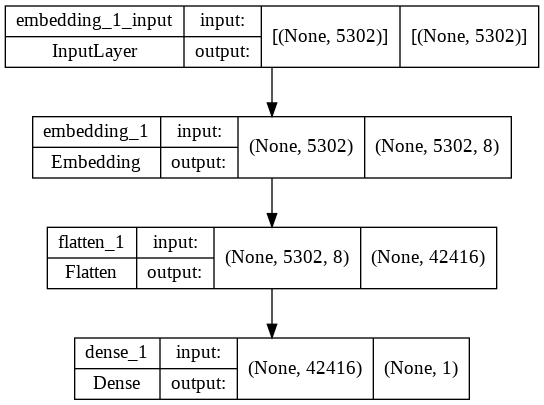

In [42]:
keras.utils.plot_model(mymodel, show_shapes=True)

In [55]:
# add checkpoint to save the network and stop if training doesn't improve
filepath = "best weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
callbacks_list = [checkpoint]

mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fiting  the model
history = mymodel.fit(X_train, y_train, epochs=100, callbacks=callbacks_list, verbose=True, validation_data=(X_test, y_test), batch_size=128)

# evaluate the model
modelloss, modelaccuracy = mymodel.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (modelaccuracy*100))

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6937 - accuracy: 0.4688
Epoch 1: val_accuracy improved from -inf to 0.53846, saving model to best weights.h5
2/2 [==============================] - 1s 212ms/step - loss: 0.6909 - accuracy: 0.5288 - val_loss: 0.7123 - val_accuracy: 0.5385
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6687 - accuracy: 0.6172
Epoch 2: val_accuracy did not improve from 0.53846
2/2 [==============================] - 0s 60ms/step - loss: 0.6679 - accuracy: 0.6250 - val_loss: 0.7008 - val_accuracy: 0.4615
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6903 - accuracy: 0.4375
Epoch 3: val_accuracy did not improve from 0.53846
2/2 [==============================] - 0s 60ms/step - loss: 0.6793 - accuracy: 0.5144 - val_loss: 0.6828 - val_accuracy: 0.5385
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6475 - accuracy: 0.6094
Epoch 4: val_accuracy improved from 0.53846 to 0.55769, 

In [56]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

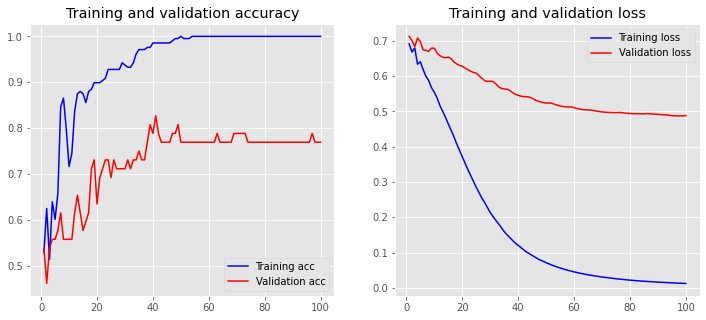

In [57]:
plot_history(history)